# GEC Data Science Program
## Level 1, Lab 2

## Project Review

By now everyone should have:
- Downloaded the Zillow data
- Understand the project objective
- Joined necessary tables
- Understand data columns
- Explored, visualized the variables

Please reach out to us if you have any questions

### Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

### Data load

We use Titanic data for this lab as well.

In [10]:
d = pd.read_csv("train.csv", index_col=0)

In [11]:
d.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### More on Visualization

#### A nice visualization library: Seaborn
https://seaborn.pydata.org/

In [6]:
# install seaborn if needed
# !pip install seaborn

In [14]:
import seaborn as sns

In [23]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [21]:
d1=d[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].fillna(0)

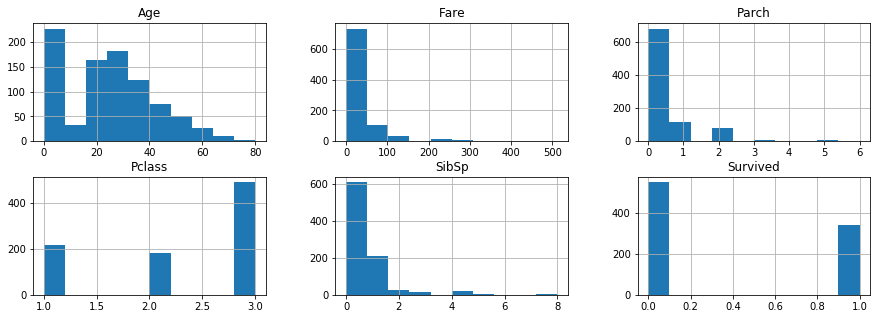

In [86]:
d1.hist(layout=(2,3), figsize=(15,5));

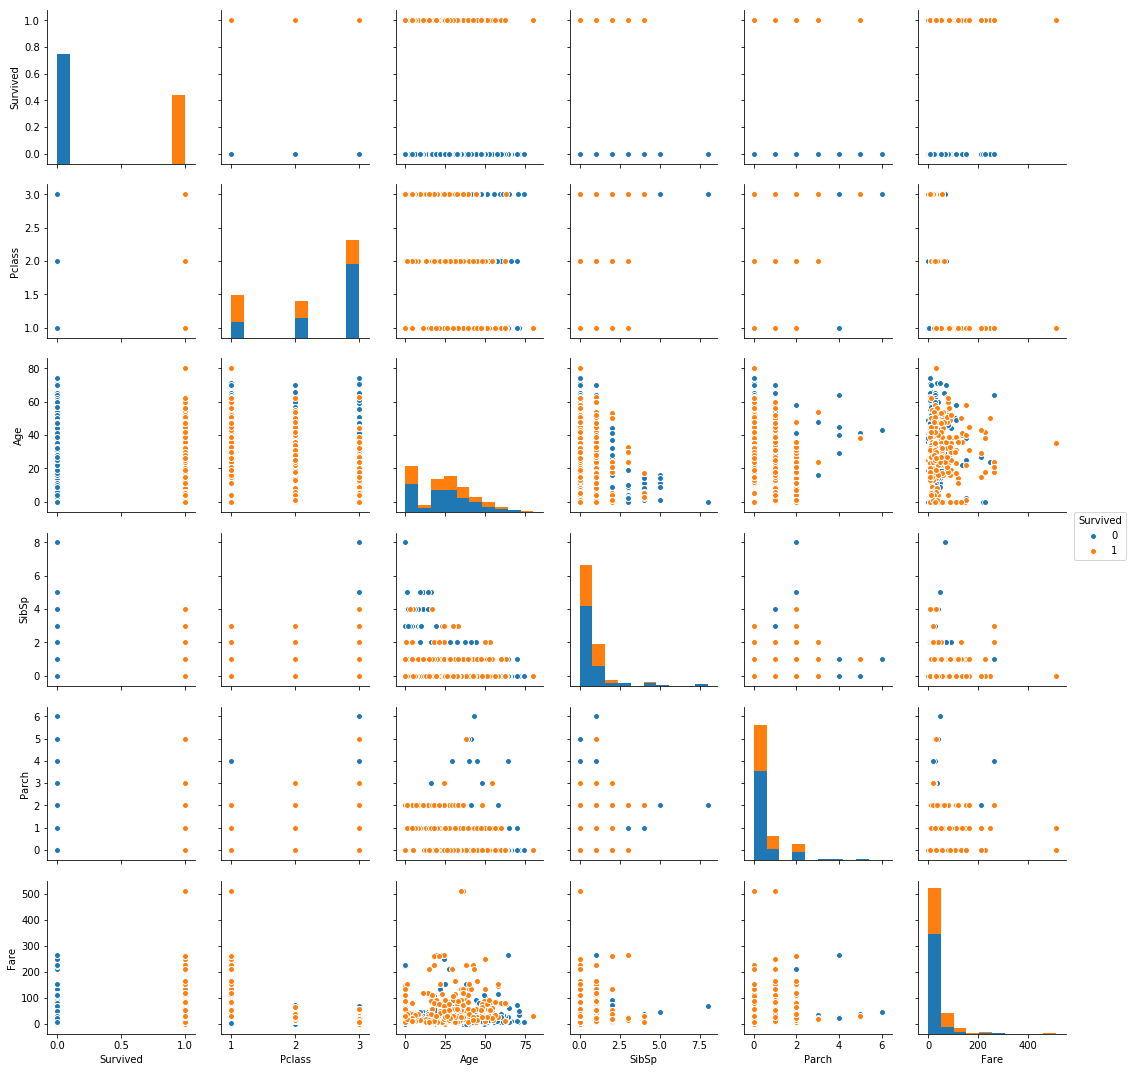

In [22]:
sns.pairplot(d1, hue="Survived");

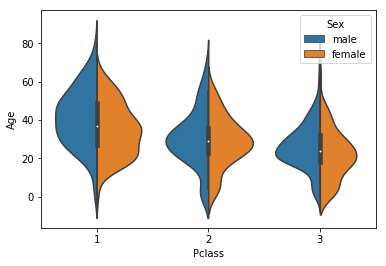

In [24]:
sns.violinplot(x="Pclass", y="Age", hue="Sex", data=d, split=True);

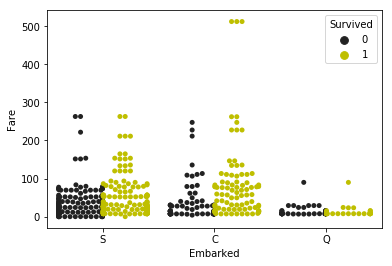

In [39]:
sns.swarmplot(x="Embarked", y="Fare", hue="Survived", data=d, split=True, color='y');

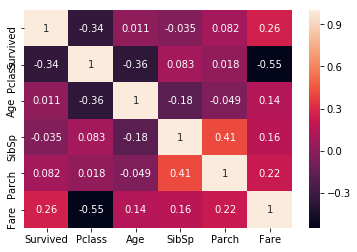

In [71]:
sns.heatmap(d1.corr(), annot=True)

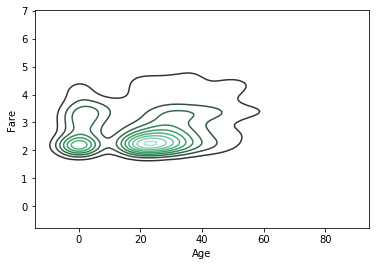

In [75]:
sns.kdeplot(d1.Age, np.log(d1.Fare+1));

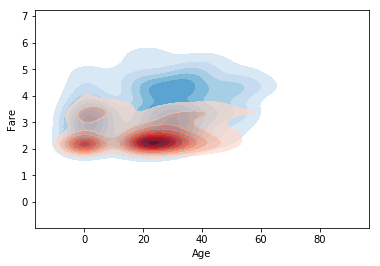

In [73]:
sns.kdeplot(d1.Age[d1.Survived==1], np.log(d1.Fare[d1.Survived==1]+1), shade=True, shade_lowest=False, cmap=plt.cm.Blues);
sns.kdeplot(d1.Age[d1.Survived==0], np.log(d1.Fare[d1.Survived==0]+1), shade=True, shade_lowest=False, cmap=plt.cm.Reds, alpha = 0.7);

## Pre-processing

### Q: what data types do we have in this dataset?

In [95]:
d.columns

Index([u'Survived', u'Pclass', u'Name', u'Sex', u'Age', u'SibSp', u'Parch',
       u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [96]:
# 'Survived' : binary
# 'Pclass'   : categorical
# 'Name'     : string
# 'Sex'      : categorical
# 'Age'      : numerical
# 'SibSp'    : numercial
# 'Parch'    : numerical
# 'Ticket'   : string
# 'Fare'     : numerical
# 'Cabin'    : string
# 'Embarked' : categorical

### Q: How many unique values are there in each column?

In [93]:
for col in d.columns:
    print col,len(d[col].unique())

Survived 2
Pclass 3
Name 891
Sex 2
Age 89
SibSp 7
Parch 7
Ticket 681
Fare 248
Cabin 148
Embarked 4


### Q: Which columns can (or cannot) be used as features?

In [100]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [101]:
target = "Survived"

In [118]:
df = d[features]

## Encoding

### Q: How do we deal with Categorical features?

In [119]:
pd.get_dummies(df, columns=["Sex"]).head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
PassengerId,,,,,,,,
1,3,22.0,1,0,7.2500,S,0.0,1.0
2,1,38.0,1,0,71.2833,C,1.0,0.0
3,3,26.0,0,0,7.9250,S,1.0,0.0
4,1,35.0,1,0,53.1000,S,1.0,0.0
5,3,35.0,0,0,8.0500,S,0.0,1.0


In [120]:
df_encoded = pd.get_dummies(df, columns=["Sex","Pclass","Embarked"], drop_first=True)

In [121]:
df_encoded.head()

,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,22.0,1,0,7.2500,1.0,0.0,1.0,0.0,1.0
2,38.0,1,0,71.2833,0.0,0.0,0.0,0.0,0.0
3,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,1.0
4,35.0,1,0,53.1000,0.0,0.0,0.0,0.0,1.0
5,35.0,0,0,8.0500,1.0,0.0,1.0,0.0,1.0


## Missing value imputation

### Q: How many missing values are there? And how do we deal with them?

In [123]:
df_encoded.isnull().sum()

Age           177
SibSp           0
Parch           0
Fare            0
Sex_male        0
Pclass_2        0
Pclass_3        0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [125]:
df_encoded.Age.fillna(df_encoded.Age.mean(), inplace=True)

In [126]:
df_encoded.isnull().sum()

Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Pclass_2      0
Pclass_3      0
Embarked_Q    0
Embarked_S    0
dtype: int64

Other ways to deal with missing values:
- prediction (e.g. linear regression)
- LVCF (last value carry forward): for time series

## Transformation

### Distribution Normalizing and Scaling

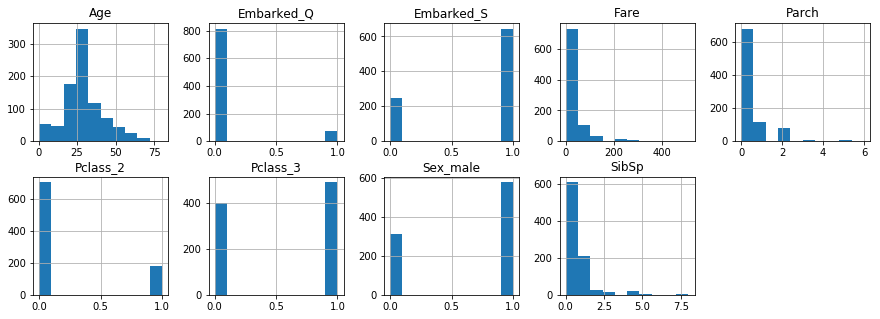

In [129]:
df_encoded.hist(layout=(2,5), figsize=(15,5));

### Q: 'Fare' is not a Normal (Gaussian) distribution. How do we make it more Normal?

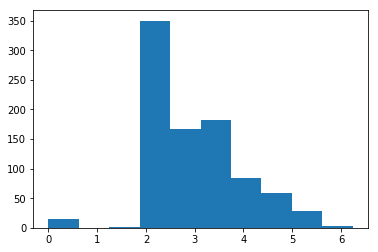

In [149]:
plt.hist(np.log(df_encoded.Fare+1));

In [166]:
dfn = df_encoded.copy()

In [167]:
dfn.Fare = np.log(df_encoded.Fare+1)

In [168]:
dfn.SibSp = np.log(df_encoded.SibSp+1)

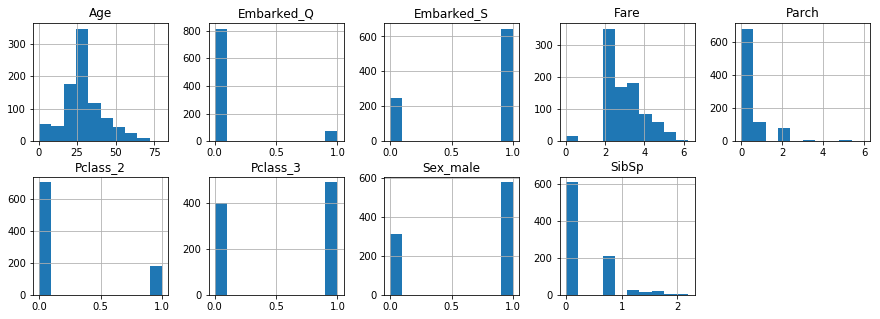

In [169]:
dfn.hist(layout=(2,5), figsize=(15,5));

### Q: How do we make all features the same scale (zero mean and one std)?

In [170]:
dfn.mean()

Age           29.699118
SibSp          0.281839
Parch          0.381594
Fare           2.962246
Sex_male       0.647587
Pclass_2       0.206510
Pclass_3       0.551066
Embarked_Q     0.086420
Embarked_S     0.722783
dtype: float64

In [171]:
dfn.std()

Age           13.002015
SibSp          0.462838
Parch          0.806057
Fare           0.969048
Sex_male       0.477990
Pclass_2       0.405028
Pclass_3       0.497665
Embarked_Q     0.281141
Embarked_S     0.447876
dtype: float64

In [172]:
dfn1 = (dfn - dfn.mean())/dfn.std()

In [173]:
dfn1.mean()

Age           4.490952e-15
SibSp        -3.982349e-16
Parch        -3.638441e-17
Fare          3.930264e-15
Sex_male     -1.687140e-16
Pclass_2      5.507504e-17
Pclass_3     -1.841649e-16
Embarked_Q    2.242875e-16
Embarked_S   -1.624838e-16
dtype: float64

In [174]:
dfn1.std()

Age           1.0
SibSp         1.0
Parch         1.0
Fare          1.0
Sex_male      1.0
Pclass_2      1.0
Pclass_3      1.0
Embarked_Q    1.0
Embarked_S    1.0
dtype: float64

### Q: How do we scale train and test data?
    a. Scale each dataset independent of the other
    b. First scale all data then split to train and test
    c. Scale training data first, then scale test data the same way (using mean and std of training data)

### Q: What's a better way to Standardize the data?

In [157]:
from sklearn import preprocessing

In [158]:
sc = preprocessing.StandardScaler()

In [175]:
dfn = sc.fit_transform(dfn)

Now we can scale the test data the same way. For example:

df_test = sc.transform(df_test)

### Principal Component Analysis (PCA)

In [180]:
from sklearn import decomposition

In [181]:
pca = decomposition.PCA()

In [182]:
df_pca = pca.fit_transform(dfn)

In [183]:
df_pca

array([[-0.97372685,  0.38227226, -1.45410221, ..., -0.78012778,
         0.23931583,  0.21597583],
       [ 1.55881189,  0.60137778,  1.94222405, ..., -0.76389432,
         0.81457666,  0.26365363],
       [-0.82953559,  0.20496609, -0.59787846, ..., -0.41087117,
        -0.003128  , -0.05608142],
       ..., 
       [ 1.14542888,  1.77436073, -1.04578548, ...,  0.25825668,
         0.1510594 , -0.09815258],
       [-0.05308606, -0.31501896,  1.27355563, ...,  0.82852086,
         0.39411206,  0.53269933],
       [-2.643618  ,  1.25202108,  2.17443396, ...,  0.11113207,
        -0.74468991, -0.00416414]])

### Plotting principal components

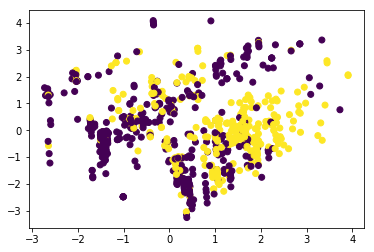

In [184]:
plt.scatter(df_pca[:,0], df_pca[:,1], c=d.Survived)

### Q: How much variation is explained by each Principal Component?

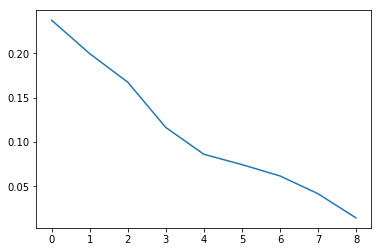

In [185]:
plt.plot(pca.explained_variance_ratio_)

## Linear Discriminant Analysis (LDA)

In [188]:
from sklearn import discriminant_analysis

In [190]:
lda = discriminant_analysis.LinearDiscriminantAnalysis()

In [192]:
df_lda = lda.fit_transform(dfn, d.Survived, )

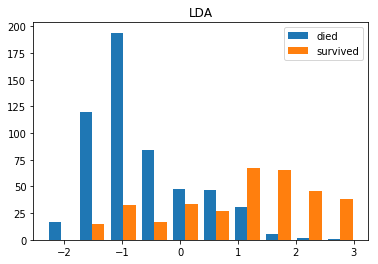

In [205]:
plt.hist([df_lda[d.Survived==0],df_lda[d.Survived==1]]);
plt.legend(['died','survived']);
plt.title("LDA");

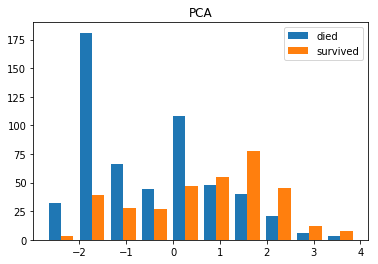

In [206]:
plt.hist([df_pca[:,0][d.Survived==0],df_pca[:,0][d.Survived==1]]);
plt.legend(['died','survived']);
plt.title("PCA")

we can see a better separation of classes with LDA.

### Homework

### Q1: Include 'title' from HW1 and create some [interesting] visualizations.

### Q2: Is there any way we can extract variables and plot 'Cabin' and 'Ticket' columns?